In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeClassifier
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score

In [16]:
"""
Load Dataset if you don't want to re-run simulation
"""

train_dataset_X_50 = np.load('train_dataset_50rings.npy')
test_dataset_X_50 = np.load('test_dataset_50rings.npy')

train_dataset_X_100 = np.load('train_dataset_100rings.npy')
test_dataset_X_100 = np.load('test_dataset_100rings.npy')

train_dataset_X_150 = np.load('train_dataset_150rings.npy')
test_dataset_X_150 = np.load('test_dataset_150rings.npy')

train_dataset_X_200 = np.load('train_dataset_200rings.npy')
test_dataset_X_200 = np.load('test_dataset_200rings.npy')

train_dataset_X_250 = np.load('train_dataset_250rings.npy')
test_dataset_X_250 = np.load('test_dataset_250rings.npy')

In [3]:
"""
Load MNIST Data (We will only use train_y and test_y)
"""
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print(len(train_X))
print(len(test_X))

60000
10000


In [4]:
"""
Returns a RidgeClassifier learned for classifying the digit i based on X and y
Note: i must be from 0-9
"""

def make_classifier(i, X, y):
    classifier = RidgeClassifier(alpha = 1e-4)
    y_i = (y == i).astype(int)
    classifier.fit(X, y_i)
    return classifier

In [5]:
"""
Class for our own MNIST classifier based on an ensemble of these RidgeClassifiers
"""
class MNISTClassifier():
    def __init__(self):
        self.classifiers = []
    
    #Makes 10 classifiers for each digit 0-9 and appends them to the classifiers list
    def learn(self, train_X, train_y):
        for i in range(10):
            classifier = make_classifier(i, train_X, train_y)
            self.classifiers.append(classifier)
        return
    
    def predict_instance(self, x):
        x = x.reshape(1, -1)
        maxval = -np.inf
        maxi = 0
        for i in range(len(self.classifiers)):
            if self.classifiers[i].decision_function(x) > maxval:
                maxval = self.classifiers[i].decision_function(x)
                maxi = i
        return maxi
      
    def predict(self, X):
        predictions = list(map(self.predict_instance, X))
        return predictions


Predictions accuracy:0.8571166666666666
Predictions precision: 0.8568301120551015


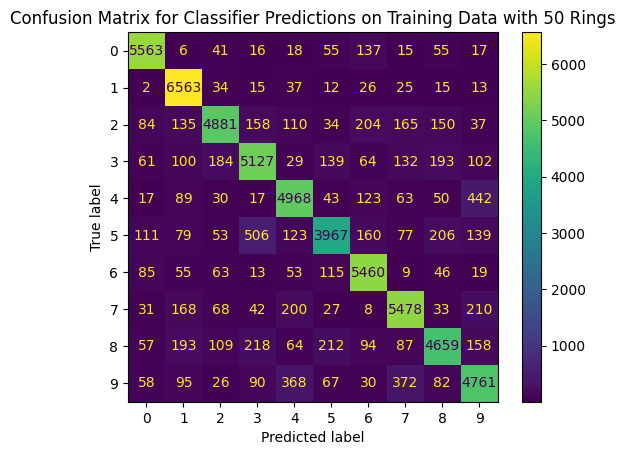

In [6]:
"""
Predict over training data for 50 rings
"""

classifier = MNISTClassifier()
classifier.learn(train_dataset_X_50, train_y)

predictions = np.array(classifier.predict(train_dataset_X_50))

print("Predictions accuracy:" + str(accuracy_score(train_y, predictions)))
print("Predictions precision: " + str(precision_score(train_y, predictions, average = 'weighted')) )
ConfusionMatrixDisplay.from_predictions(train_y, predictions)
plt.title("Confusion Matrix for Classifier Predictions on Training Data with 50 Rings")
plt.show()

Predictions accuracy:0.8288
Predictions precision: 0.8281211021817515


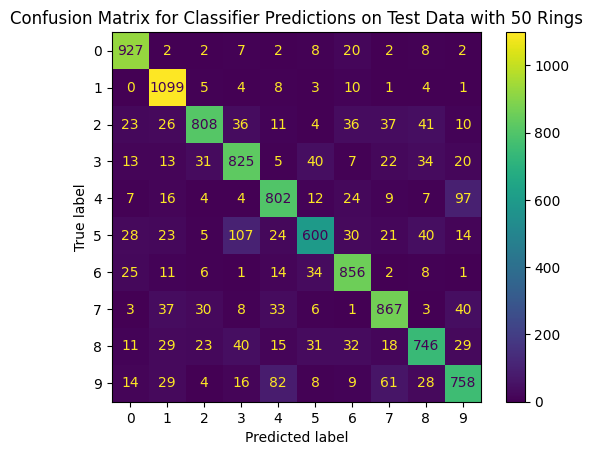

In [7]:
"""
Predict over testing data for 50 rings
"""

predictions = np.array(classifier.predict(test_dataset_X_50))

print("Predictions accuracy:" + str(accuracy_score(test_y, predictions)))
print("Predictions precision: " + str(precision_score(test_y, predictions, average = 'weighted')))
ConfusionMatrixDisplay.from_predictions(test_y, predictions)
plt.title("Confusion Matrix for Classifier Predictions on Test Data with 50 Rings")
plt.show()

Predictions accuracy:0.91975
Predictions precision: 0.919671482669583


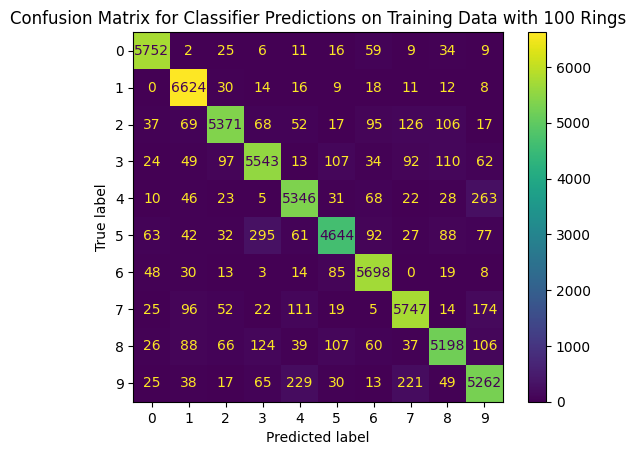

In [8]:
"""
Predict over training data for 100 rings
"""

classifier = MNISTClassifier()
classifier.learn(train_dataset_X_100, train_y)

predictions = np.array(classifier.predict(train_dataset_X_100))

print("Predictions accuracy:" + str(accuracy_score(train_y, predictions)))
print("Predictions precision: " + str(precision_score(train_y, predictions, average = 'weighted')) )
ConfusionMatrixDisplay.from_predictions(train_y, predictions)
plt.title("Confusion Matrix for Classifier Predictions on Training Data with 100 Rings")
plt.show()

Predictions accuracy:0.8632
Predictions precision: 0.8628489112213843


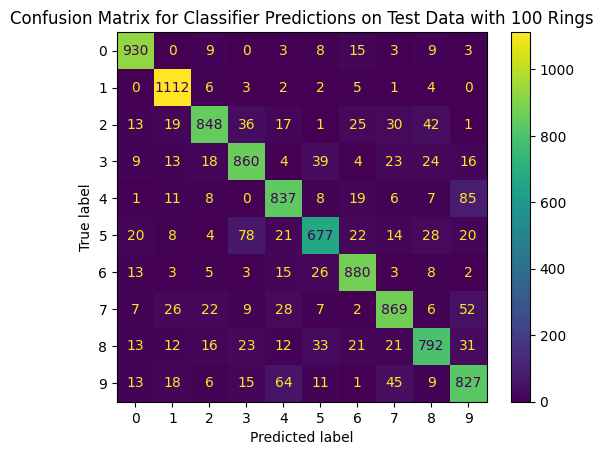

In [9]:
"""
Predict over testing data for 100 rings
"""

predictions = np.array(classifier.predict(test_dataset_X_100))

print("Predictions accuracy:" + str(accuracy_score(test_y, predictions)))
print("Predictions precision: " + str(precision_score(test_y, predictions, average = 'weighted')))
ConfusionMatrixDisplay.from_predictions(test_y, predictions)
plt.title("Confusion Matrix for Classifier Predictions on Test Data with 100 Rings")
plt.show()

Predictions accuracy:0.9475
Predictions precision: 0.9474525689431963


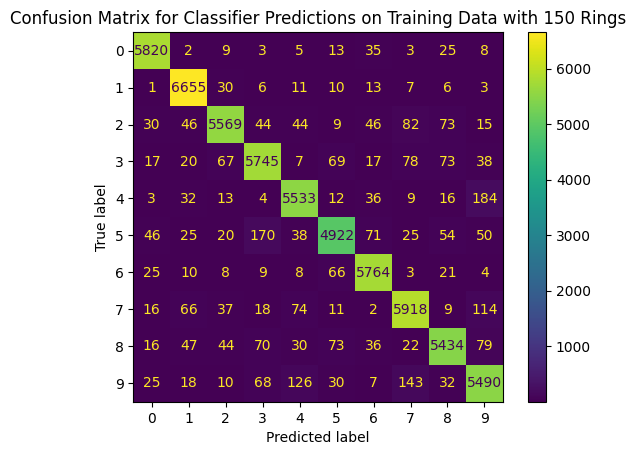

In [17]:
"""
Predict over training data for 150 rings
"""

classifier = MNISTClassifier()
classifier.learn(train_dataset_X_150, train_y)

predictions = np.array(classifier.predict(train_dataset_X_150))

print("Predictions accuracy:" + str(accuracy_score(train_y, predictions)))
print("Predictions precision: " + str(precision_score(train_y, predictions, average = 'weighted')) )
ConfusionMatrixDisplay.from_predictions(train_y, predictions)
plt.title("Confusion Matrix for Classifier Predictions on Training Data with 150 Rings")
plt.show()

Predictions accuracy:0.8754
Predictions precision: 0.8752389463591733


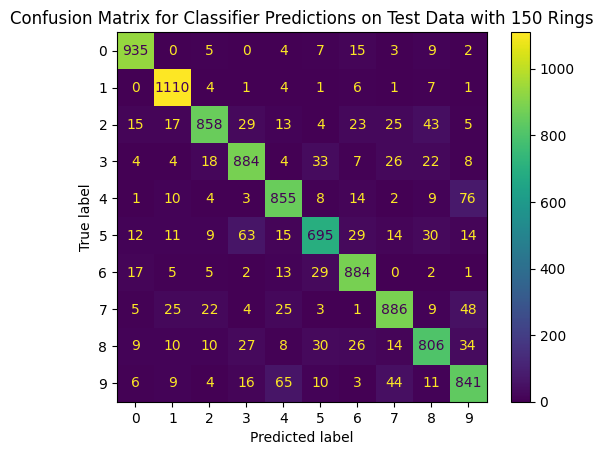

In [18]:
"""
Predict over testing data for 100 rings
"""

predictions = np.array(classifier.predict(test_dataset_X_150))

print("Predictions accuracy:" + str(accuracy_score(test_y, predictions)))
print("Predictions precision: " + str(precision_score(test_y, predictions, average = 'weighted')))
ConfusionMatrixDisplay.from_predictions(test_y, predictions)
plt.title("Confusion Matrix for Classifier Predictions on Test Data with 150 Rings")
plt.show()

Predictions accuracy:0.9650333333333333
Predictions precision: 0.9649955832183607


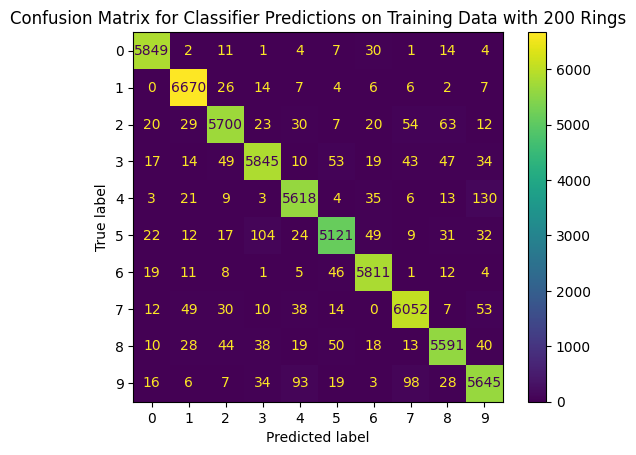

In [10]:
"""
Predict over training data for 200 rings
"""

classifier = MNISTClassifier()
classifier.learn(train_dataset_X_200, train_y)

predictions = np.array(classifier.predict(train_dataset_X_200))

print("Predictions accuracy:" + str(accuracy_score(train_y, predictions)))
print("Predictions precision: " + str(precision_score(train_y, predictions, average = 'weighted')) )
ConfusionMatrixDisplay.from_predictions(train_y, predictions)
plt.title("Confusion Matrix for Classifier Predictions on Training Data with 200 Rings")
plt.show()

Predictions accuracy:0.8799
Predictions precision: 0.8797905215625187


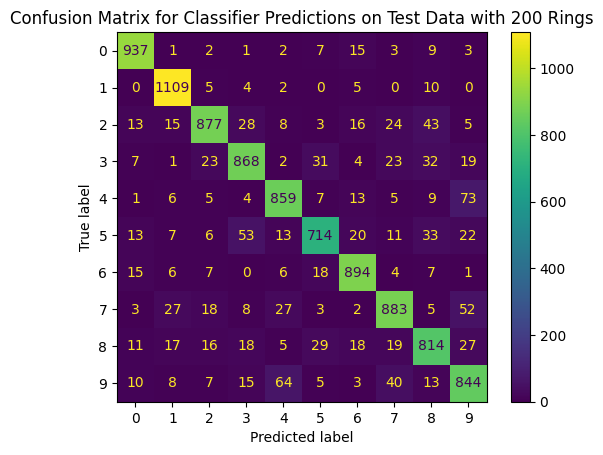

In [11]:
"""
Predict over testing data for 200 rings
"""

predictions = np.array(classifier.predict(test_dataset_X_200))

print("Predictions accuracy:" + str(accuracy_score(test_y, predictions)))
print("Predictions precision: " + str(precision_score(test_y, predictions, average = 'weighted')))
ConfusionMatrixDisplay.from_predictions(test_y, predictions)
plt.title("Confusion Matrix for Classifier Predictions on Test Data with 200 Rings")
plt.show()

Predictions accuracy:0.97735
Predictions precision: 0.9773389273098076


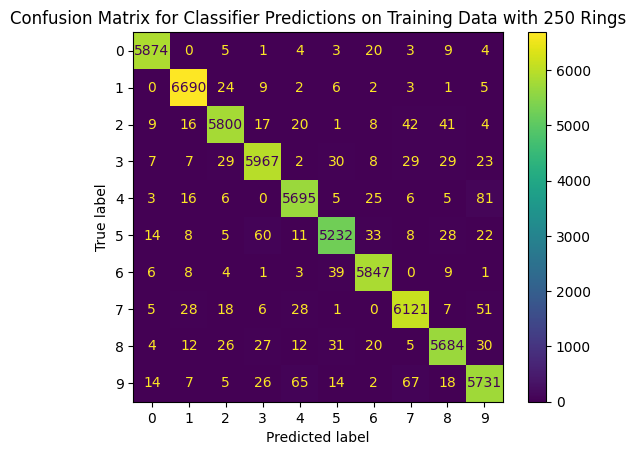

In [12]:
"""
Predict over training data for 250 rings
"""

classifier = MNISTClassifier()
classifier.learn(train_dataset_X_250, train_y)

predictions = np.array(classifier.predict(train_dataset_X_250))

print("Predictions accuracy:" + str(accuracy_score(train_y, predictions)))
print("Predictions precision: " + str(precision_score(train_y, predictions, average = 'weighted')) )
ConfusionMatrixDisplay.from_predictions(train_y, predictions)
plt.title("Confusion Matrix for Classifier Predictions on Training Data with 250 Rings")
plt.show()

Predictions accuracy:0.8824
Predictions precision: 0.8821095504151178


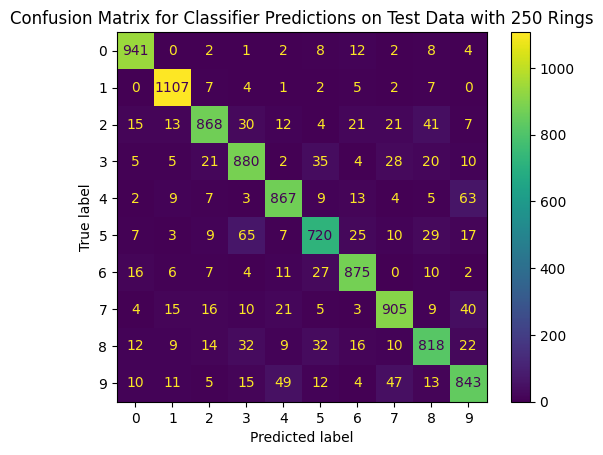

In [13]:
"""
Predict over testing data for 250 rings
"""

predictions = np.array(classifier.predict(test_dataset_X_250))

print("Predictions accuracy:" + str(accuracy_score(test_y, predictions)))
print("Predictions precision: " + str(precision_score(test_y, predictions, average = 'weighted')))
ConfusionMatrixDisplay.from_predictions(test_y, predictions)
plt.title("Confusion Matrix for Classifier Predictions on Test Data with 250 Rings")
plt.show()